In [121]:
import numpy as np
import matplotlib.pyplot as plt

class Box():
    """Box defines a square in the occupancy grid that has an obstacle"""
    def __init__(self, x, y):
        self.x, self.y = x,y

class Obstacle():
    """Obstacle contains all of the occupied boxes in the grid for one obstacle"""
    def __init__(self, start_box, num_boxes, x_bound, y_bound):
        self.boxes = [start_box]
        self.num_boxes = num_boxes
        self.generate(x_bound, y_bound)

    def generate(self, x_bound, y_bound):
        for _ in range(self.num_boxes-1):
            self.add(x_bound, y_bound)

    def checkPlacements(self, box, x_bound, y_bound):
        # Check right
        free_right = True
        if box.x + 1 >= x_bound or any([other_box.y == box.y and other_box.x == box.x+1 for other_box in self.boxes]):
            free_right = False
        # Check left
        free_left = True
        if box.x - 1 < 0 or any([other_box.y == box.y and other_box.x == box.x-1 for other_box in self.boxes]):
            free_left = False
        # Check up
        free_up = True
        if box.y + 1 >= y_bound or any([other_box.x == box.x and other_box.y == box.y+1 for other_box in self.boxes]):
            free_up = False
        # Check down
        free_down = True
        if box.y -1 < 0 or any([other_box.x == box.x and other_box.y == box.y-1 for other_box in self.boxes]):
            free_down = False
        free_places = [free_right, free_left, free_up, free_down]
        return free_places

    def getBoxPlacements(self,x_bound, y_bound):
        # Filter out boxes that are surrounded on all sides by other boxes or the map boundary
        filtered_boxes = []
        free_placements = []
        for box in self.boxes:
            free_places = self.checkPlacements(box, x_bound, y_bound)
            if any(free_places):
                filtered_boxes.append(box)
                free_placements.append(free_places)
        return filtered_boxes, free_placements

    def add(self, x_bound, y_bound):
        """Add a box building from existing boxes"""
        filtered_boxes, free_placements = self.getBoxPlacements(x_bound, y_bound)
        # If you have no valid placements. Give up
        if len(filtered_boxes) == 0:
            return None
        # Now pick where to add a box
        box_datas = [(box, place) for box, place in zip(filtered_boxes, free_placements)]
        box_data_id = np.random.choice(list(range(len(box_datas))))
        root_box, places = box_datas[box_data_id][0], box_datas[box_data_id][1]
        choices = ['right', 'left', 'up', 'down']
        valid_choices = []
        for choice, place in zip(choices, places):
            if place:
                valid_choices.append(choice)
        # We chose where to put it
        chosen = np.random.choice(valid_choices)
        delta = np.array([0,0])
        if chosen == 'right':
            delta[0]+=1
        elif chosen == 'left':
            delta[0]-=1
        elif chosen == 'up':
            delta[1]+=1
        elif chosen == 'down':
            delta[1]-=1
        # Create the box
        box = Box(x=root_box.x+delta[0], y=root_box.y+delta[1])
        # Add the box, finally
        self.boxes.append(box)

[(5, 5), (5, 6), (5, 7), (5, 8), (6, 6), (7, 6), (8, 6)]
5 5 [True, True, False, True]
5 6 [False, True, False, False]
5 7 [True, True, False, False]
5 8 [True, True, True, False]
6 6 [False, False, True, True]
7 6 [False, False, True, True]
8 6 [True, False, True, True]


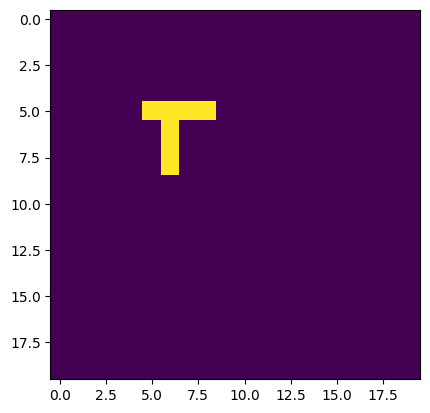

In [122]:
"""Tests"""
# box = Box(x=9,y=9)
# obstacle = Obstacle(box, 0, x_bound=10, y_bound=10)
# obstacle.checkPlacements(box, 10, 10)

boxes = [
    Box(5,5),
    Box(5,6),
    Box(5,7),
    Box(5,8),
    Box(6,6),
    Box(7,6),
    Box(8,6)
]

obstacle = Obstacle(box,0,20,20)
print([(box.x, box.y) for box in boxes])
obstacle.boxes = boxes

occupancy_grid = np.zeros((20,20))
for box in obstacle.boxes:
    occupancy_grid[box.x, box.y] = 1

filtered_boxes, free_placements = obstacle.getBoxPlacements(10,10)
for box, free_place in zip(filtered_boxes, free_placements):
    print(box.x, box.y, free_place)

plt.imshow(occupancy_grid)

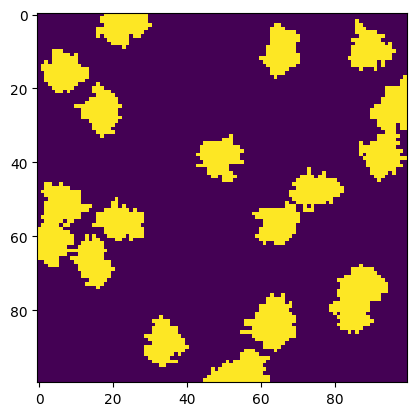

In [126]:
# Generate obstacles in an occupancy grid
x_bound = 100
y_bound = 100
occupancy_grid = np.zeros((100,100))

# Pick where to place obstacles
num_obstacles = 20
num_boxes = 100
xs = np.random.uniform(0, x_bound, num_obstacles).astype(int)
ys = np.random.uniform(0, y_bound, num_obstacles).astype(int)

# Generate obstacles
obstacles = [Obstacle(Box(x,y), num_boxes, x_bound, y_bound) for x,y in zip(xs, ys)]

# Fill the occupancy grid
for obstacle in obstacles:
    for box in obstacle.boxes:
        occupancy_grid[box.x, box.y] = 1

plt.imshow(occupancy_grid)

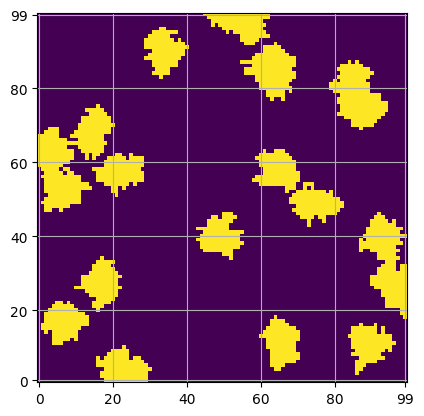

In [133]:
# I like the map I generated. I want to flip the y-axis so I can see it how it's meant to be seen
vis_grid = np.flip(occupancy_grid,axis=0)
plt.yticks(ticks=[0,20,40,60,80,99], labels=[99,80,60,40,20,0])
plt.xticks(ticks=[0,20,40,60,80,99], labels=[0,20,40,60,80,99])
plt.imshow(vis_grid)

In [212]:
# There are some squares that are blocked entirely by obstacles. I'm going to clean this to fill those holes to make coding easier later
def plotGrid(occupancy_grid, ax=None):
    vis_grid = np.flip(occupancy_grid,axis=0)
    if ax is None:
        plt.yticks(ticks=list(range(0,100,5)), labels=reversed(list(range(0,100,5))))
        plt.xticks(ticks=list(range(0,100,5)), labels=list(range(0,100,5)))
        plt.grid()
        plt.imshow(vis_grid)
    else:
        ax.imshow(vis_grid)

In [139]:
def generateOccupancyGrid(x_bound, y_bound, num_obstacles, num_boxes):
    # Generate obstacles in an occupancy grid
    occupancy_grid = np.zeros((x_bound,y_bound))

    # Pick where to place obstacles
    xs = np.random.uniform(0, x_bound, num_obstacles).astype(int)
    ys = np.random.uniform(0, y_bound, num_obstacles).astype(int)

    # Generate obstacles
    obstacles = [Obstacle(Box(x,y), num_boxes, x_bound, y_bound) for x,y in zip(xs, ys)]

    # Fill the occupancy grid
    for obstacle in obstacles:
        for box in obstacle.boxes:
            occupancy_grid[box.x, box.y] = 1

    return occupancy_grid

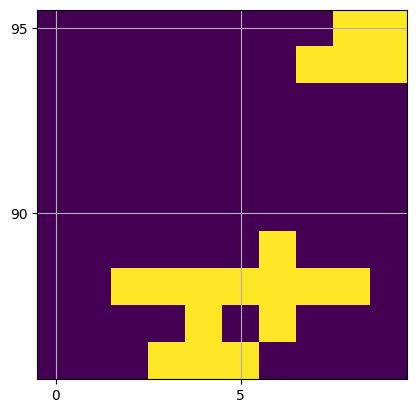

In [186]:
x_bound=10
y_bound=10
occupancy_grid = generateOccupancyGrid(x_bound=x_bound, y_bound=y_bound, num_obstacles=4, num_boxes=5)
plotGrid(occupancy_grid)

In [202]:
# I can do that computationally. Pick a start square. Any square that is not connected to this square (behind an obstacle) gets marked as an obstacle
root_node = np.array([5,5])

# Each node has 4 connections. Each connection is either valid or invalid. Once you know if the validity of each connection, you are done with that node
nodes_to_check = [root_node]
# connection of each checked node. is it connected to the root or not?
checked_nodes = np.zeros(occupancy_grid.shape)
connectivity_grid = np.zeros(mini_grid.shape)

def out_of_bounds(node, x_bound, y_bound):
    if node[0] >= x_bound or node[0] < 0:
        return True
    elif node[1] >= y_bound or node[1] < 0:
        return True
    return False

# keep running until we are done checking nodes
while len(nodes_to_check) > 0:
    # It's a queue. Get the one that has been there the longest
    node = nodes_to_check[0]
    # Check if this node is occupied or not (or out of bounds, which counts as occupied here)
    if out_of_bounds(node, x_bound, y_bound):
        connected = 0
    else:
        connected = 1 - mini_grid[node[0], node[1]]
    # Get its neighbors
    neighbors = [
        node+[1,0],
        node+[-1,0],
        node+[0,1],
        node+[0,-1]
    ]
    # See if we have checked each neighbor. Add them to check if not
    for neighbor in neighbors:
        if out_of_bounds(neighbor, x_bound, y_bound):
            # Don't check this neighbor if it's out of bounds
            continue
        elif mini_grid[node[0], node[1]] == 1:
            # Don't check this neighbor if it's occupied
            continue
        elif checked_nodes[neighbor[0], neighbor[1]] == 1:
            # Don't check this neighbor if we already checked it
            continue
        else:
            nodes_to_check.append(neighbor)

    del nodes_to_check[0]
    checked_nodes[node[0], node[1]] = 1
    connectivity_grid[node[0], node[1]] = connected

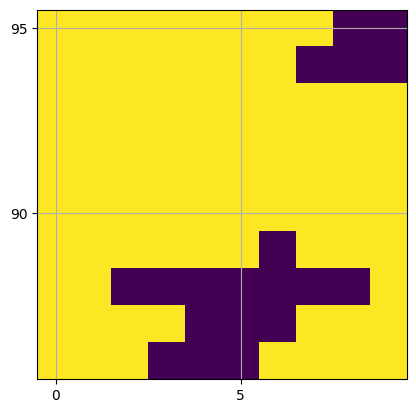

In [203]:
# I want to visualize - which ones are connected?
plotGrid(connectivity_grid)

In [219]:
def generateConnectivityGrid(occupancy_grid, root_node, save_intermediate_plots=False):
    if save_intermediate_plots:
        fig, ax = plt.subplots(1,1)
    # Each node has 4 connections. Each connection is either valid or invalid. Once you know if the validity of each connection, you are done with that node
    nodes_to_check = [root_node]
    # connection of each checked node. is it connected to the root or not?
    checked_nodes = np.zeros(occupancy_grid.shape)
    connectivity_grid = np.zeros(occupancy_grid.shape)

    x_bound = occupancy_grid.shape[0]
    y_bound = occupancy_grid.shape[1]

    def out_of_bounds(node, x_bound, y_bound):
        if node[0] >= x_bound or node[0] < 0:
            return True
        elif node[1] >= y_bound or node[1] < 0:
            return True
        return False

    # keep running until we are done checking nodes
    i = 0
    while len(nodes_to_check) > 0:
        # It's a queue. Get the one that has been there the longest
        node = nodes_to_check[0]
        # Check if this node is occupied or not (or out of bounds, which counts as occupied here)
        if out_of_bounds(node, x_bound, y_bound):
            connected = 0
        else:
            connected = 1 - occupancy_grid[node[0], node[1]]
        # Get its neighbors
        neighbors = [
            node+[1,0],
            node+[-1,0],
            node+[0,1],
            node+[0,-1]
        ]
        # See if we have checked each neighbor. Add them to check if not
        for neighbor in neighbors:
            if out_of_bounds(neighbor, x_bound, y_bound):
                # Don't check this neighbor if it's out of bounds
                continue
            elif occupancy_grid[node[0], node[1]] == 1:
                # Don't check this neighbor if it's occupied
                continue
            elif checked_nodes[neighbor[0], neighbor[1]] == 1:
                # Don't check this neighbor if we already checked it
                continue
            else:
                nodes_to_check.append(neighbor)

        del nodes_to_check[0]
        checked_nodes[node[0], node[1]] = 1
        connectivity_grid[node[0], node[1]] = connected
        plotGrid(connectivity_grid, ax)
        fig.savefig('outfigs/conenctions_'+str(i)+'.png')
        i+=1
    return connectivity_grid

KeyboardInterrupt: 

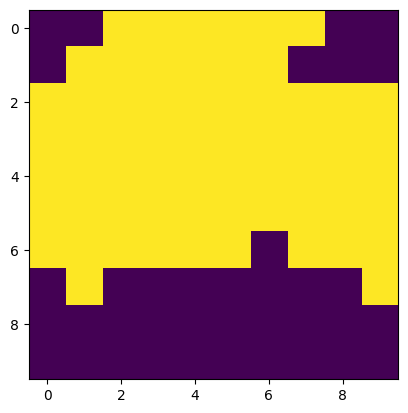

In [218]:
generateConnectivityGrid(mini_grid, np.array([5,5]),save_intermediate_plots = True);

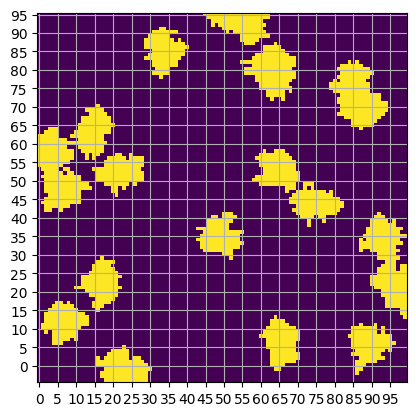

In [210]:
plotGrid(occupancy_grid)

KeyboardInterrupt: 

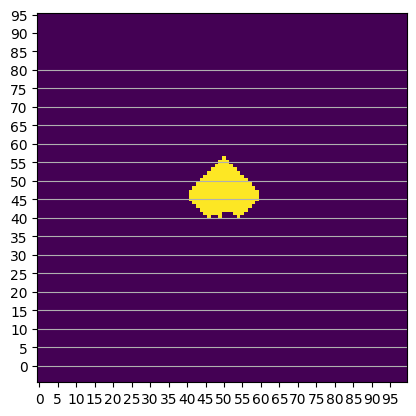

In [211]:
connectivity_grid = generateConnectivityGrid(occupancy_grid, np.array([50,50]))
plotGrid(connectivity_grid)